# seaborn으로 그래프 그리기

In [2]:
# unix 환경
# !pip3 install seaborn

# anaconda 환경
!conda install -y conda=24.7.1
!conda install -y seaborn


Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - conda=24.7.1


The following packages will be DOWNGRADED:

  conda                              24.9.2-py312hca03da5_0 --> 24.7.1-py312hca03da5_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - seaborn


The following packages will be UPDATED:

  conda                              24.7.1-py312hca03da5_0 --> 24.9.2-py312hca03da5_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<`bike.csv`의 설명>
- workingday : 일하는 날인지 여부
- holiday : 휴일인지 여부
- registered : 정기권을 끊은 사람들의 대여 건수
- casual : 정기권을 끊지 않은 사람들의 대여 건수
- total : registered + casual의 총합

In [2]:
df = pd.read_csv('../data-2/bike.csv') # 자전거 사용 데이터 프레임
df

,month,day,quarter,day_of_week,workingday,holiday,temperature,humidity,windspeed,registered,casual,total
0,1,1,1Q,SUN,0,0,21.4,72,12,1608,686,2294
1,1,2,1Q,MON,0,1,15.0,44,19,1707,244,1951
2,1,3,1Q,TUE,1,0,7.6,39,23,2147,89,2236
3,1,4,1Q,WED,1,0,0.4,35,11,2273,95,2368
4,1,5,1Q,THU,1,0,14.2,49,6,3132,140,3272
...,...,...,...,...,...,...,...,...,...,...,...,...
361,12,27,4Q,THU,1,0,10.0,83,24,1867,247,2114
362,12,28,4Q,FRI,1,0,14.0,45,10,2451,644,3095
363,12,29,4Q,SAT,0,0,14.9,72,9,1182,159,1341
364,12,30,4Q,SUN,0,0,16.5,54,26,1432,364,1796


- 월별 총 대여 건수의 평균 막대 차트

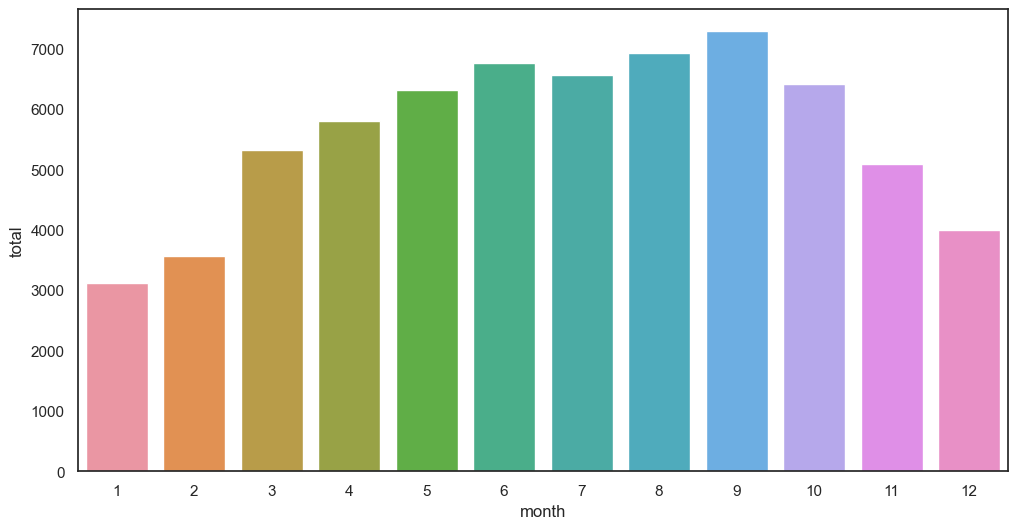

In [14]:
# pandas plot(matplotlib)은 df.plot(x, y, ...)가 있었던 반면,

#rc는 runtime configuration, seaborn의 그래프 기본 설정을 지정하는 딕셔너리 형식의 매개변수

# ci(confidence_interval) 신뢰구간을 표시하지 않겠다는 뜻.


> seaborn의 자동화
> - df_bike.csv는 일별로 나타나있어,1월의 값이 30개가 있음에도, 알아서 대표값 1개로 추출해주었다. 여기서 대표값 추출 방법은 무엇일까? 바로 ```자동으로 평균값을 산출```해준 것이다.

- 월별 일하는 여부에 따른 총 대여 건수 막대 차트

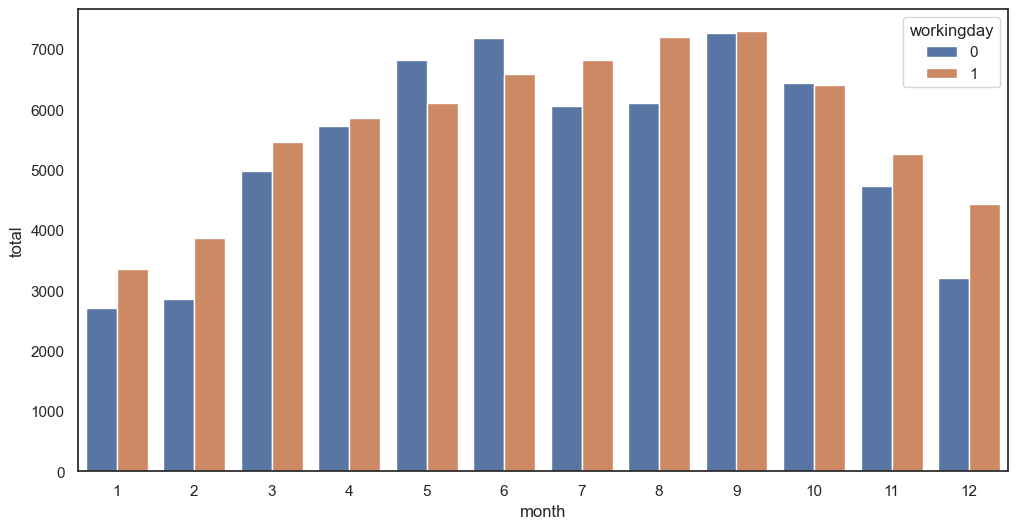

In [15]:
sns.set_theme(rc={'figure.figsize': (12, 6)}, style='white')
sns.barplot(data=df, x='month', y='total', ci=None, hue='workingday') 
# hue는 seaborn에서 색상 구분을 통해 데이터를 그룹화하여 시각화할 때 사용하는 매개변수.
plt.show()

- 월별 일하는 여부에 따른 정기권을 끊은 사람들의 대여 건수 막대 차트

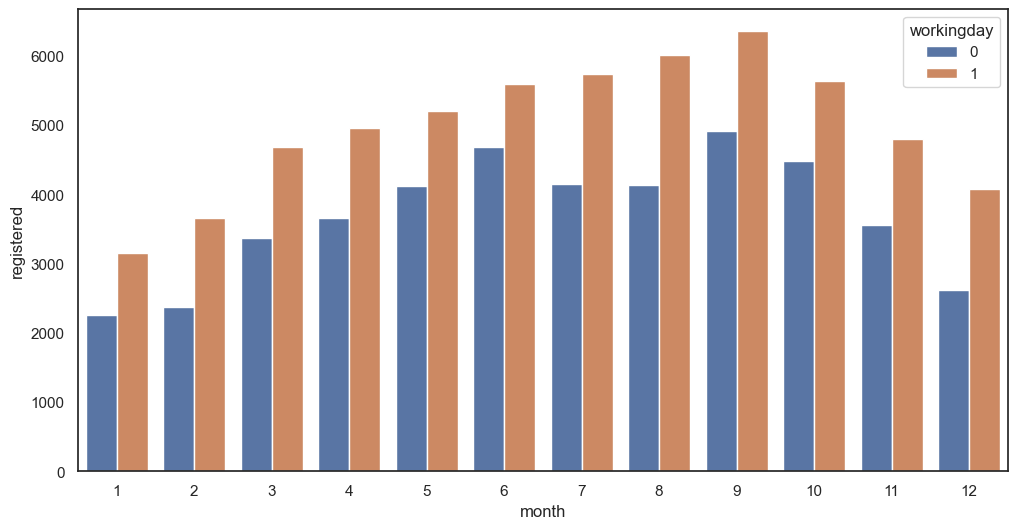

In [16]:
sns.set_theme(rc={'figure.figsize': (12, 6)}, style='white')
sns.barplot(data=df, x='month', y='registered', ci=None, hue='workingday') 
# hue는 seaborn에서 색상 구분을 통해 데이터를 그룹화하여 시각화할 때 사용하는 매개변수.
plt.show()

> -> 정기권을 끊은 사람들은 출근을 할 때 많이 이용하시는구나!

- 월별 일하는 여부에 따른 정기권을 끊지 않은 사람들의 대여 건수 막대 차트

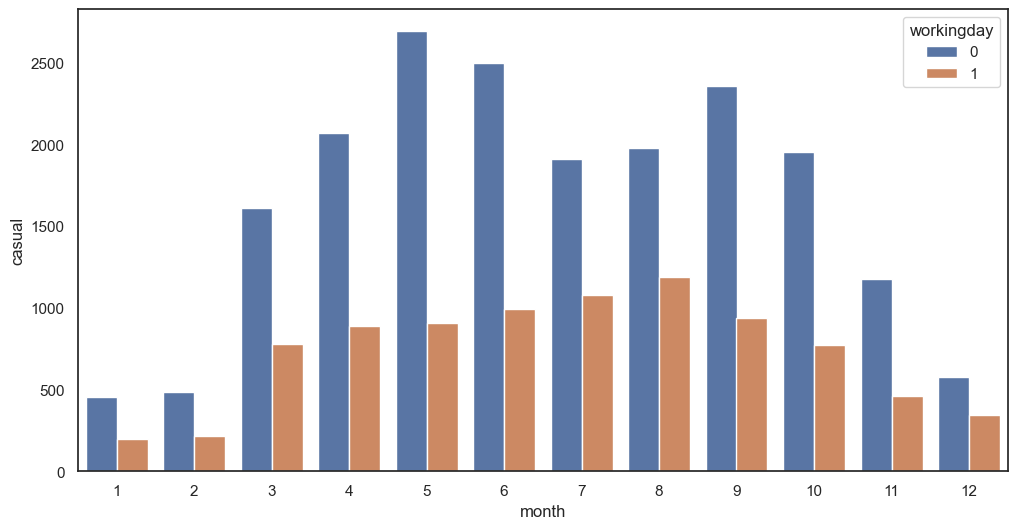

In [17]:
sns.set_theme(rc={'figure.figsize': (12, 6)}, style='white')
sns.barplot(data=df, x='month', y='casual', ci=None, hue='workingday') # hue는 seaborn에서 색상 구분을 통해 데이터를 그룹화하여 시각화할 때 사용하는 매개변수.
plt.show()

> -> 정기권을 끊지 않은 사람들은 쉬는 날에 대부분 이용하시는 고객들이구나. 그렇지, 일주일에서 쉬는 날이 며칠 안되고, 그렇게 간헐적으로 이용하시는 거라면 정기권을 끊을 필요가 없으니까!

- 선 그래프로 연속적으로 이어주면, 면적 간의 비교가 되므로 한 눈에 비교가 쉽다!

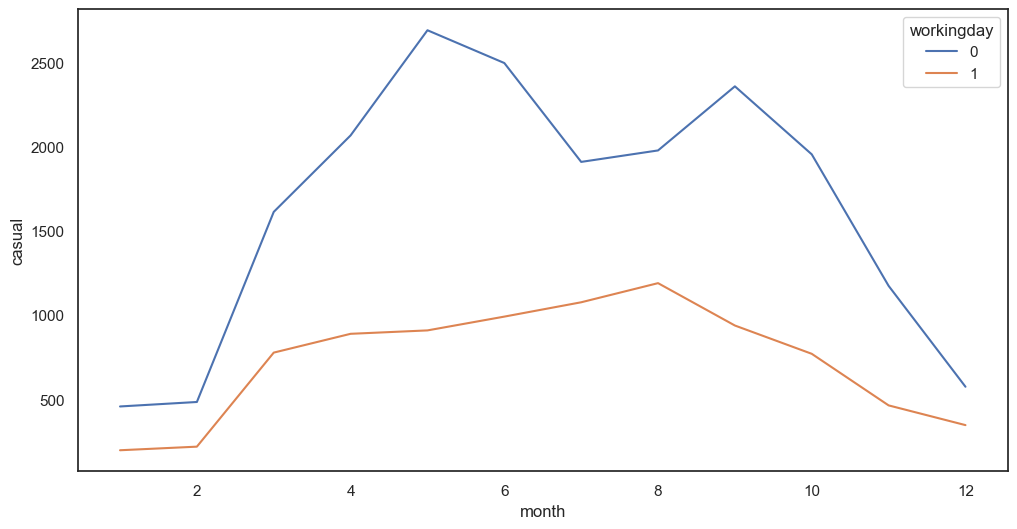

In [19]:
sns.set_theme(rc={'figure.figsize': (12, 6)}, style='white')
sns.lineplot(data=df, x='month', y='casual', ci=None, hue='workingday') # hue는 seaborn에서 색상 구분을 통해 데이터를 그룹화하여 시각화할 때 사용하는 매개변수.
plt.show()

## (심화학습) set_theme() 함수로 그래프 커스터마이징하기

### 1. 기본 set_theme()
- 기본값은 darkgrid로, `그래프 배경이 흰 가로선이 있는 회색 배경` 설정됨.
    - 기본 style : 'darkgrid'로 설정되어 있기 때문이다.

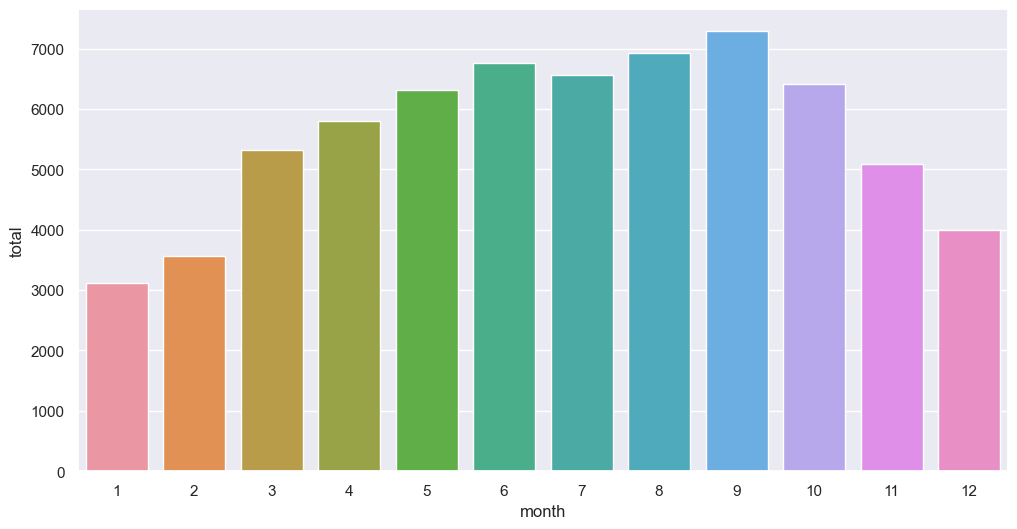

In [21]:
sns.set_theme() # style='darkgrid'라는 값이 기본 값.
sns.barplot(data=df, x='month', y='total', ci=None)
plt.show()

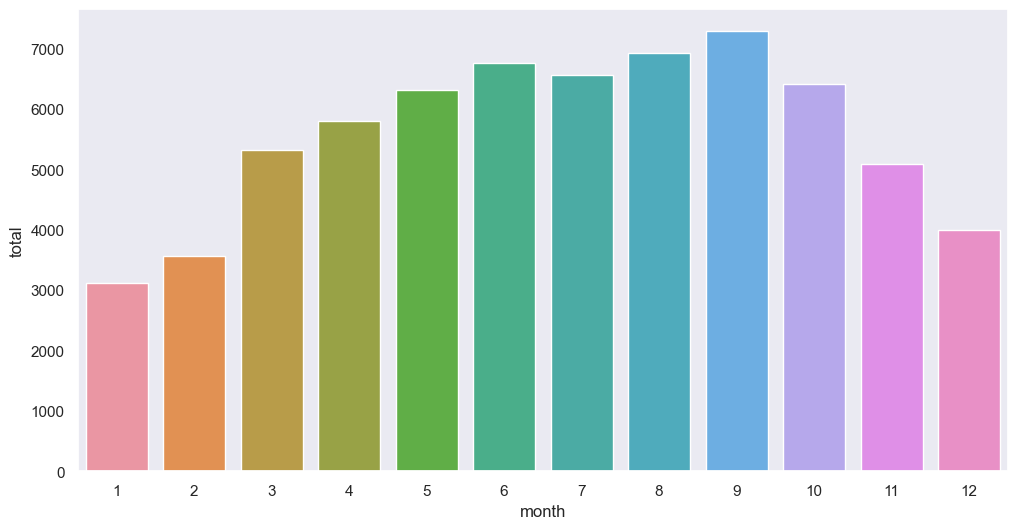

In [22]:
sns.set_theme(style='dark') # 가로 선이 없는 그냥 회색 바탕으로 바뀜.
sns.barplot(data=df, x='month', y='total', ci=None)
plt.show()

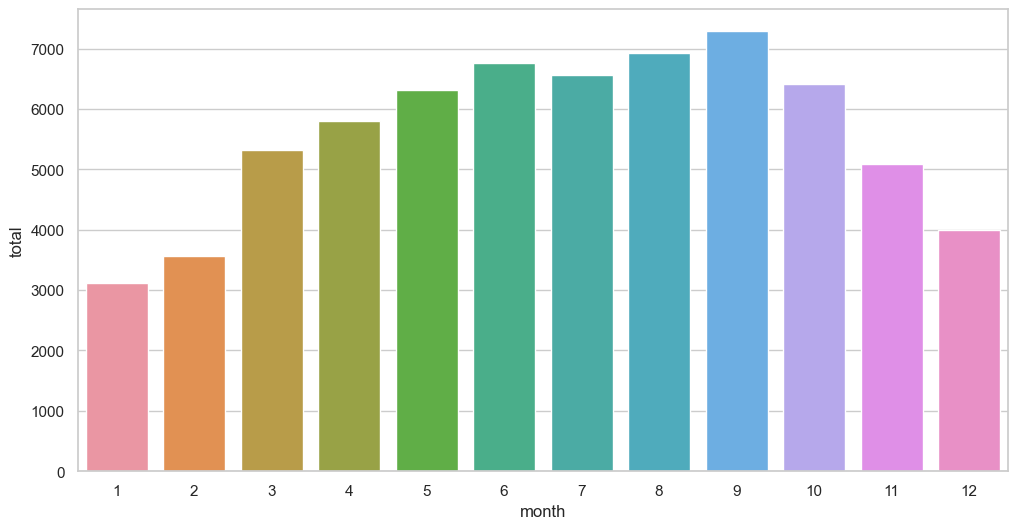

In [24]:
sns.set_theme(style='whitegrid') # 회색 가로 선이 있는 흰색 바탕으로 바뀜.
sns.barplot(data=df, x='month', y='total', ci=None)
plt.show()

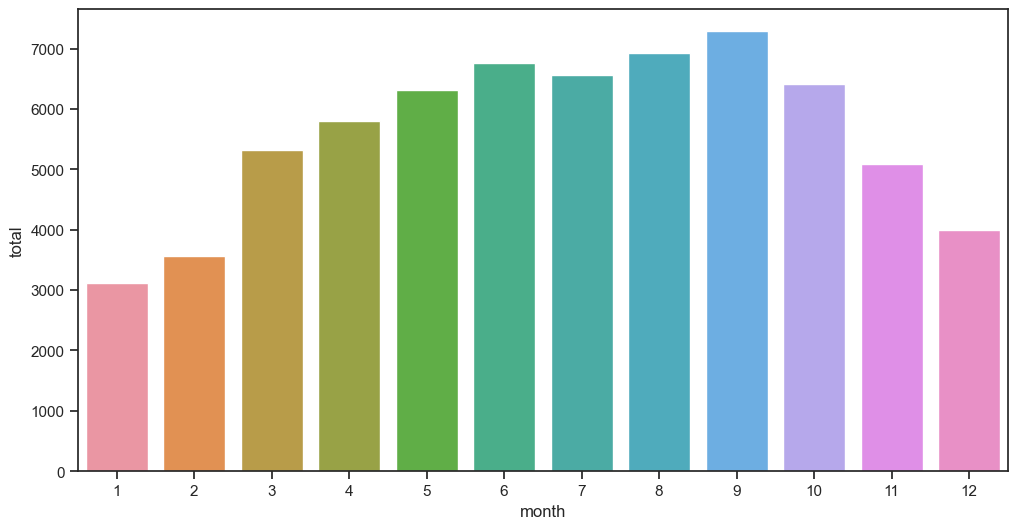

In [25]:
sns.set_theme(style='ticks') # x, y 축에 눈금이 생긴다.
sns.barplot(data=df, x='month', y='total', ci=None)
plt.show()

### 2. 폰트 설정하기 : 특히 한글 폰트 설정하는 법
1. Windows
    ```python
    set_theme(style='white', font='Malgun Gothic')
    ```


2. Mac
    ```python
    set_theme(style='white', font='AppleGothic')
    ```


3. 폰트 사이즈 설정하기
    - 기본 크기 보다 더 작게
        ```python
        set_theme(style='white', font='AppleGothic', font_scale=(0~1))
        ```
    - 기본 크기 보다 더 크게
        ```python
        set_theme(style='white', font='AppleGothic', font_scale=(1~))
        ```

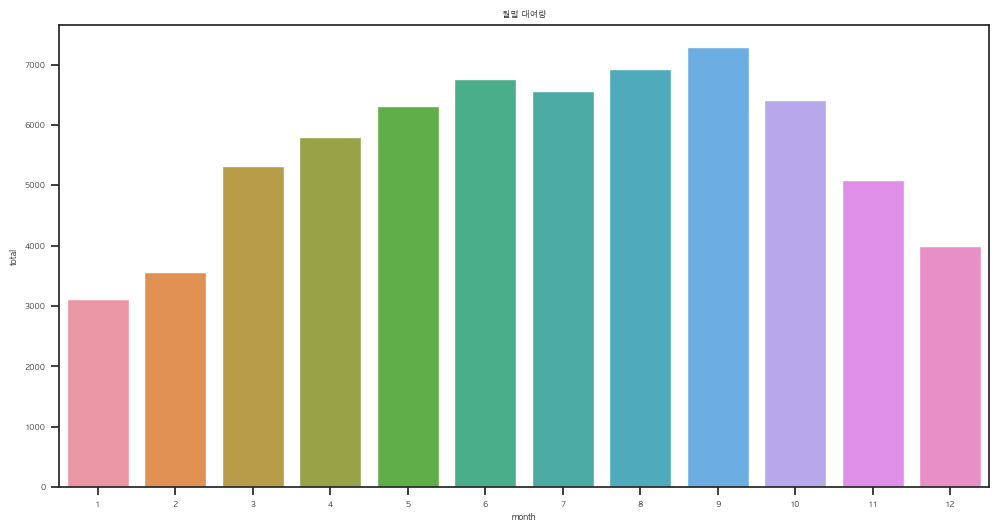

In [33]:
sns.set_theme(style='ticks', font='AppleGothic', font_scale=0.5) # x, y 축에 눈금이 생긴다.
sns.barplot(data=df, x='month', y='total', ci=None)
plt.title('월별 대여량')
plt.show()

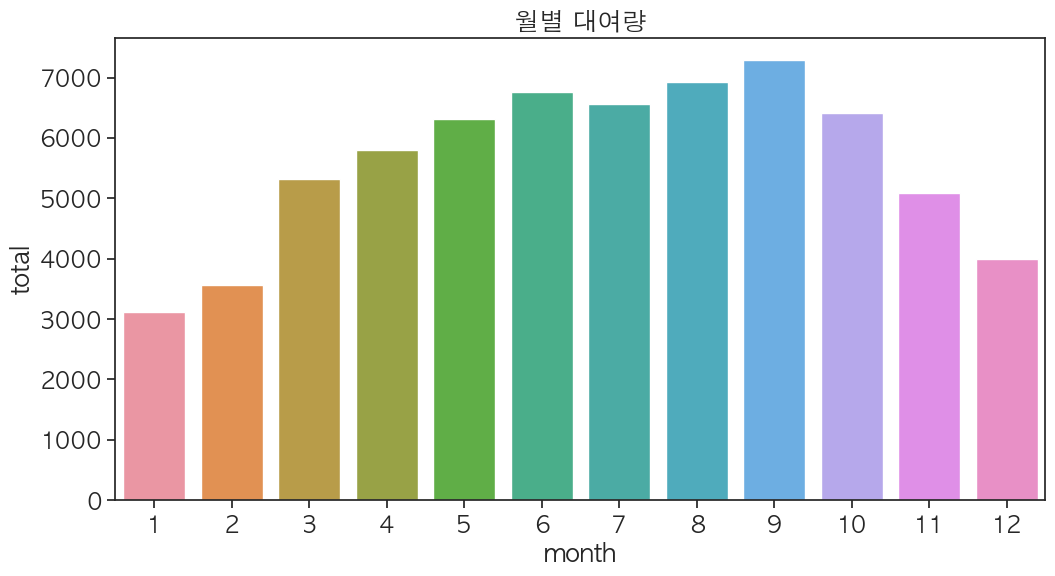

In [32]:
sns.set_theme(style='ticks', font='AppleGothic', font_scale=1.5) # x, y 축에 눈금이 생긴다.
sns.barplot(data=df, x='month', y='total', ci=None)
plt.title('월별 대여량')
plt.show()

### 3. 팔레트(palette) 설정하기
- 사용할 물감을 미리 짜 놓는 팔레트 처럼, `그래프에서 사용할 색들의 집합`을 의미함.
- 기본 palette는 `'deep'`
    - 그 외에도, 'pastel', 'muted', 'bright', 'dark', 'colorblind'
    1. `set_theme()` : 전역 그래프의 팔레트 지정
    2. `특정 그래프의 옵션` : 특정 그래프의 팔레트 지정

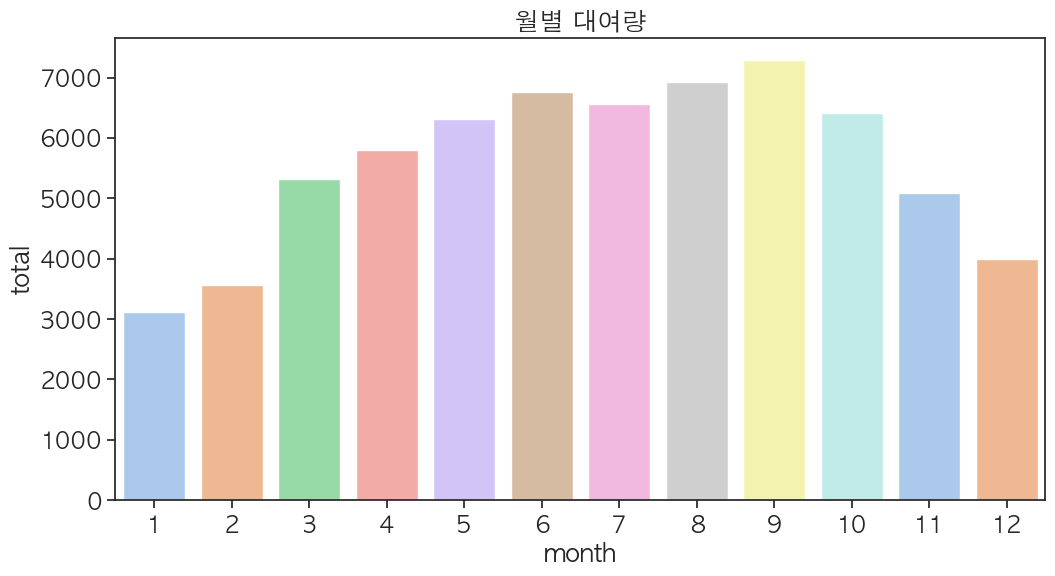

In [40]:
sns.set_theme(style='ticks', font='AppleGothic', font_scale=1.5,
             palette = 'pastel') # x, y 축에 눈금이 생긴다.
sns.barplot(data=df, x='month', y='total', ci=None, palette = 'pastel')
plt.title('월별 대여량')
plt.show()

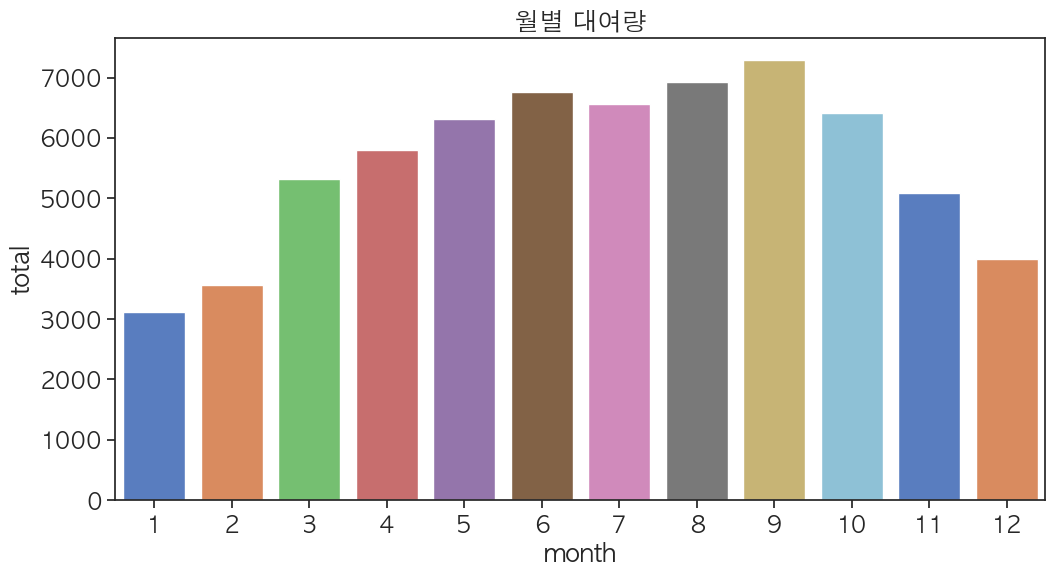

In [41]:
sns.set_theme(style='ticks', font='AppleGothic', font_scale=1.5,
             palette = 'muted') # x, y 축에 눈금이 생긴다.
sns.barplot(data=df, x='month', y='total', ci=None, palette = 'muted')
plt.title('월별 대여량')
plt.show()

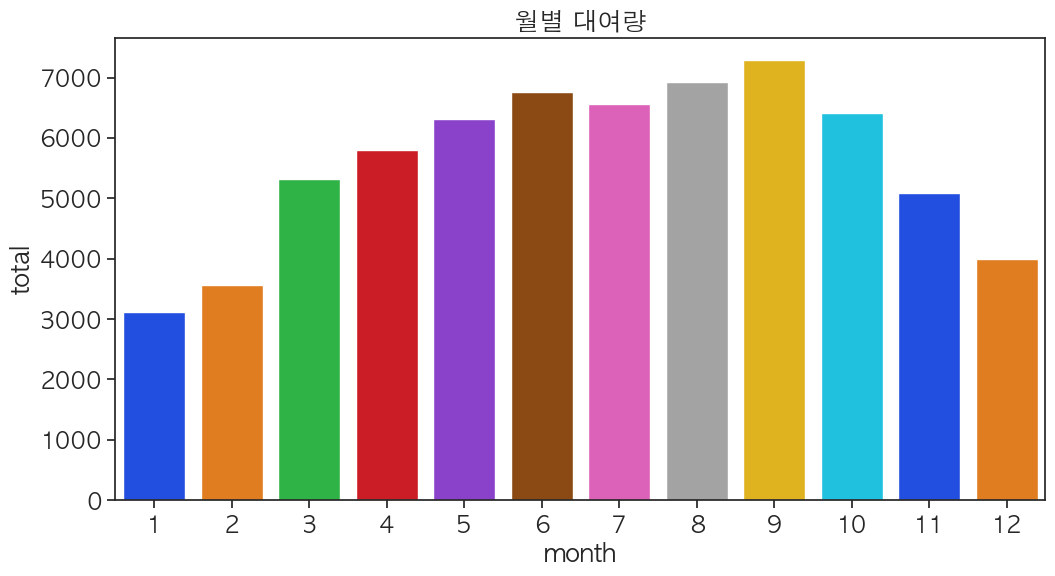

In [42]:
sns.set_theme(style='ticks', font='AppleGothic', font_scale=1.5,
             palette = 'bright') # x, y 축에 눈금이 생긴다.
sns.barplot(data=df, x='month', y='total', ci=None, palette = 'bright')
plt.title('월별 대여량')
plt.show()

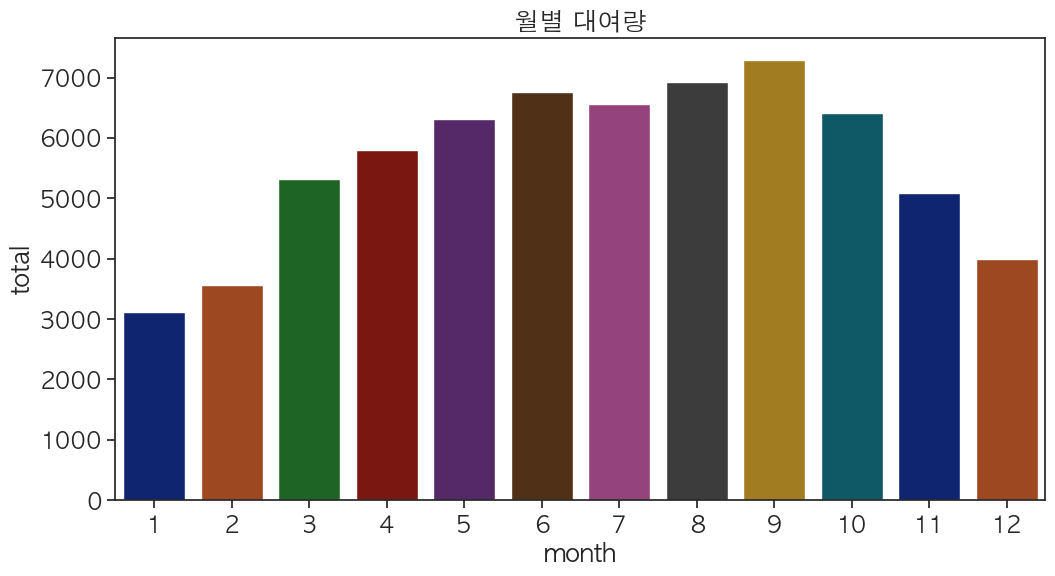

In [43]:
sns.set_theme(style='ticks', font='AppleGothic', font_scale=1.5,
             palette = 'dark') # x, y 축에 눈금이 생긴다.
sns.barplot(data=df, x='month', y='total', ci=None, palette = 'dark')
plt.title('월별 대여량')
plt.show()

- 색맹용 색상 팔레트

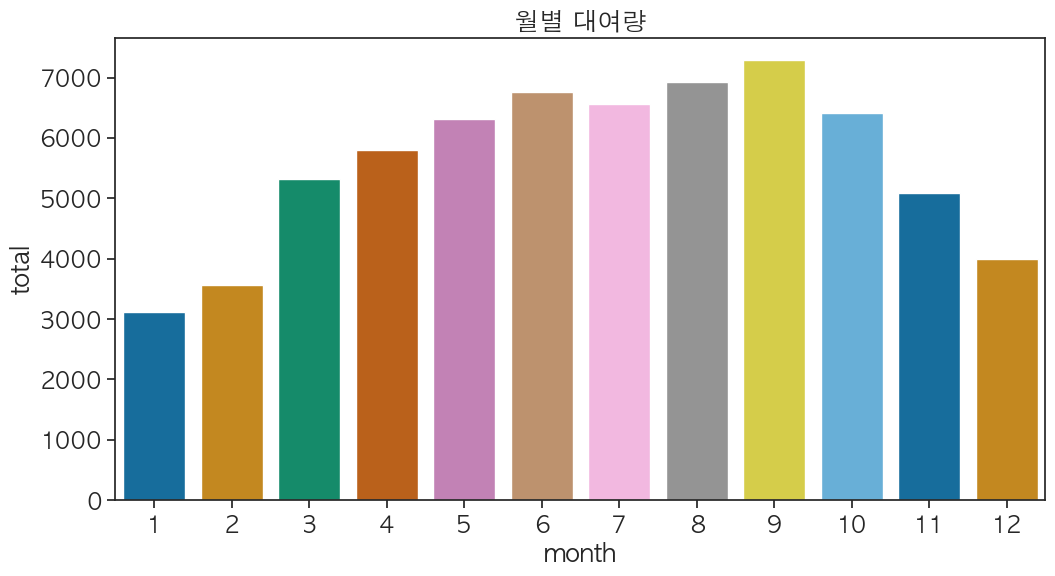

In [44]:
sns.set_theme(style='ticks', font='AppleGothic', font_scale=1.5,
             palette = 'colorblind') # x, y 축에 눈금이 생긴다.
sns.barplot(data=df, x='month', y='total', ci=None, palette = 'colorblind')
plt.title('월별 대여량')
plt.show()

### 4. 그래프 크기 조절하기
- `rc` (runtime configuration)
    - 그래프 기본 설정을 담당하는 dict 안에 `키:값`으로 지정하여 사용하면 됩니다.
        ```python
        sns.set_theme(rc={'figure.figsize':(12,6)})
        ```

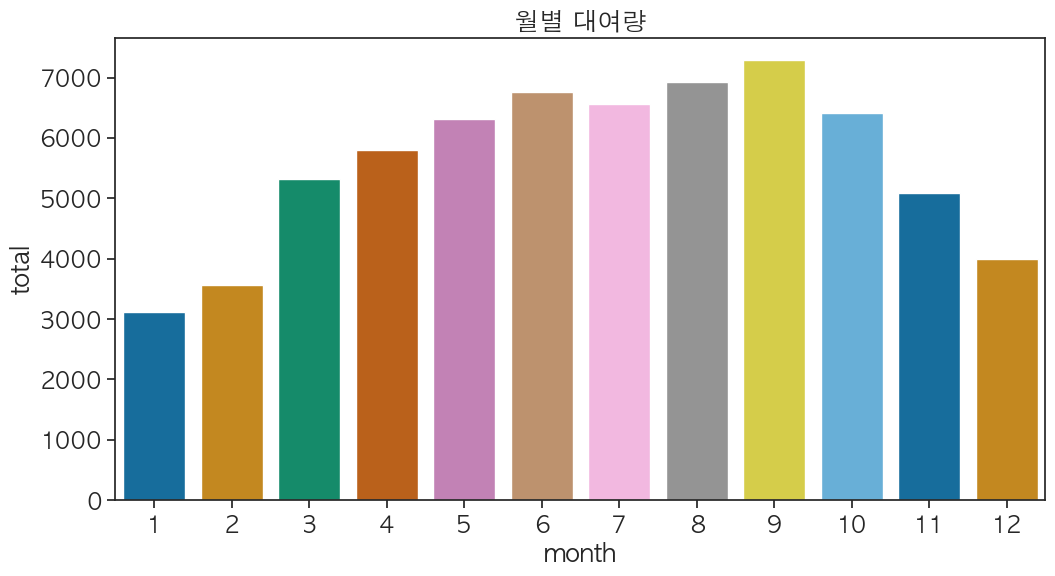

In [49]:
sns.set_theme(style='ticks', font='AppleGothic', font_scale=1.5,
             palette = 'colorblind', rc={'figure.figsize':(12,6)} ) # x, y 축에 눈금이 생긴다.
sns.barplot(data=df, x='month', y='total', ci=None, palette = 'colorblind')
plt.title('월별 대여량')
plt.show()